## Connect to TPU


In [1]:
import keras
keras.__version__
from keras import backend as K
#K.tensorflow_backend._get_available_gpus()
import tensorflow as tf

from tensorflow.python.client import device_lib
local_device_protos = device_lib.list_local_devices()

for val in local_device_protos:
  print(val.device_type)

CPU
TPU_SYSTEM
TPU
TPU
TPU
TPU
TPU
TPU
TPU
TPU


2024-02-25 15:47:43.505784: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:47:43.505884: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:47:43.505971: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:47:43.506068: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:47:43.506160: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:47:43.506353: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:47:43.506436: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this 

In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.python.keras import backend as K

sess = tf.compat.v1.Session()
K.set_session(sess)


In [3]:
!pip install matplotlib seaborn plotly pandas missingno numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 32.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:

import sys
import os
import math

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.dpi'] = 300
%matplotlib inline
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import *

from PIL import Image, ImageEnhance
from tensorflow.keras.preprocessing.image import *

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import json

In [5]:
import pathlib
import tensorflow as tf

train_dir = pathlib.Path('/kaggle/input/brain-tumor-mri-dataset/Training')
test_dir = pathlib.Path('/kaggle/input/brain-tumor-mri-dataset/Testing')
img_height=512
img_width=512 

In [6]:
train_ds  = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=64)


Found 5712 files belonging to 4 classes.
Using 4570 files for training.


2024-02-25 15:48:03.140211: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:48:03.140363: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:48:03.140437: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:48:03.140505: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:48:03.140564: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:48:03.140743: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:48:03.140847: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this 

In [7]:
test_ds  = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=64)


Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


In [8]:
val_ds  = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  validation_split=None,
  subset=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=64)


Found 1311 files belonging to 4 classes.


## Visualize the data distribution

In [9]:
ROOT_DIR = r"/kaggle/input/brain-tumor-mri-dataset"
TRAIN_DIR = os.path.join(ROOT_DIR, 'Training')
TEST_DIR = os.path.join(ROOT_DIR, 'Testing')
assert os.path.isdir(ROOT_DIR) and os.path.isdir(TRAIN_DIR) and os.path.isdir(TEST_DIR)
TUMOR_CLASS = ['meningioma', 'glioma', 'pituitary', 'notumor']
IMAGE_DATA_PATHS = [os.path.join(TRAIN_DIR, tumor_class) for tumor_class in TUMOR_CLASS]
TEST_DATA_PATHS = [os.path.join(TEST_DIR, tumor_class) for tumor_class in TUMOR_CLASS]

In [10]:
TEST_DATA_PATHS

['/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma',
 '/kaggle/input/brain-tumor-mri-dataset/Testing/glioma',
 '/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary',
 '/kaggle/input/brain-tumor-mri-dataset/Testing/notumor']

In [11]:
data_distribution_count = pd.Series([len(os.listdir(path)) for path in TEST_DATA_PATHS if os.path.exists(path) and os.path.isdir(path)],index = TUMOR_CLASS)
data_distribution_count

meningioma    306
glioma        300
pituitary     300
notumor       405
dtype: int64

In [12]:
data_distribution_count = pd.Series([len(os.listdir(path)) for path in IMAGE_DATA_PATHS if os.path.exists(path) and os.path.isdir(path)],index = TUMOR_CLASS)
data_distribution_count

meningioma    1339
glioma        1321
pituitary     1457
notumor       1595
dtype: int64

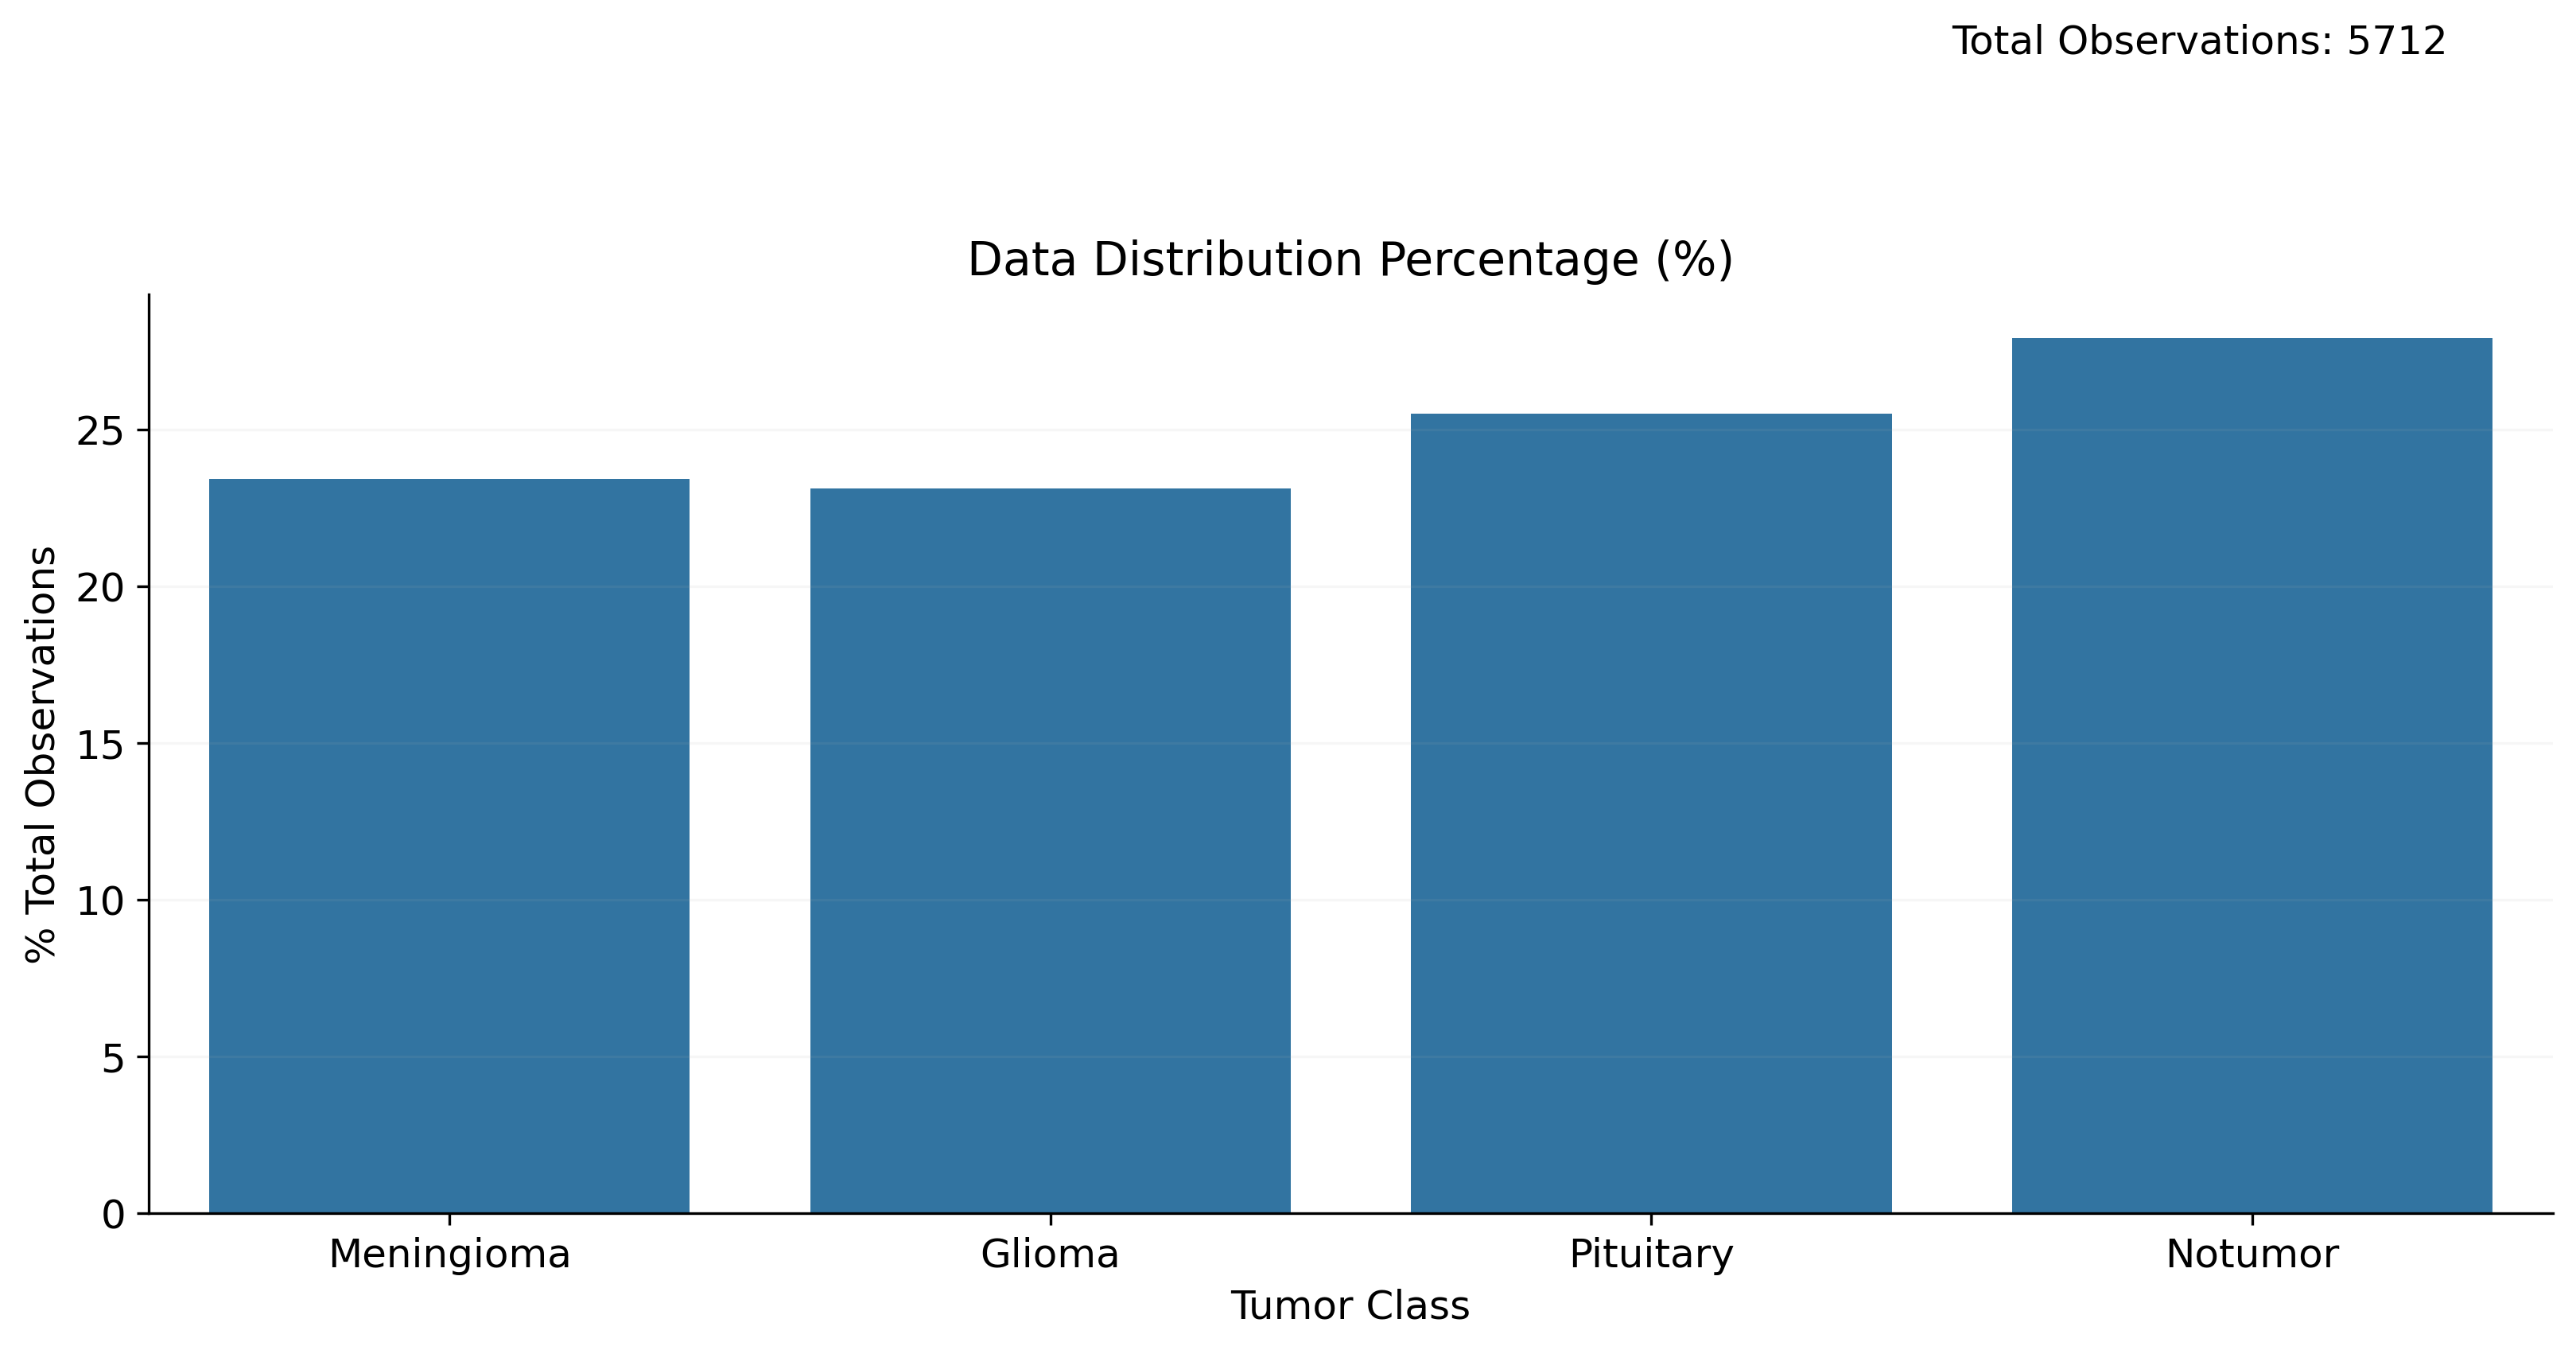

In [13]:
fig, axis = plt.subplots(figsize = (13, 5))
axis.grid(True, alpha = 0.1)
axis.set_title("Data Distribution Percentage (%)", fontsize = 14)
sns.barplot(x = ['\n'.join(curr_index.strip().split('_')).title() for curr_index in data_distribution_count.index],
            y = 100 * (data_distribution_count / data_distribution_count.sum()), ax = axis)
axis.set_xlabel("Tumor Class", fontsize = 12)
axis.set_ylabel("% Total Observations", fontsize = 12)
axis.tick_params(which = 'major', labelsize = 12)
axis.text(2.5, 37, f'Total Observations: {data_distribution_count.sum()}', fontdict = dict(size = 12))
sns.despine()

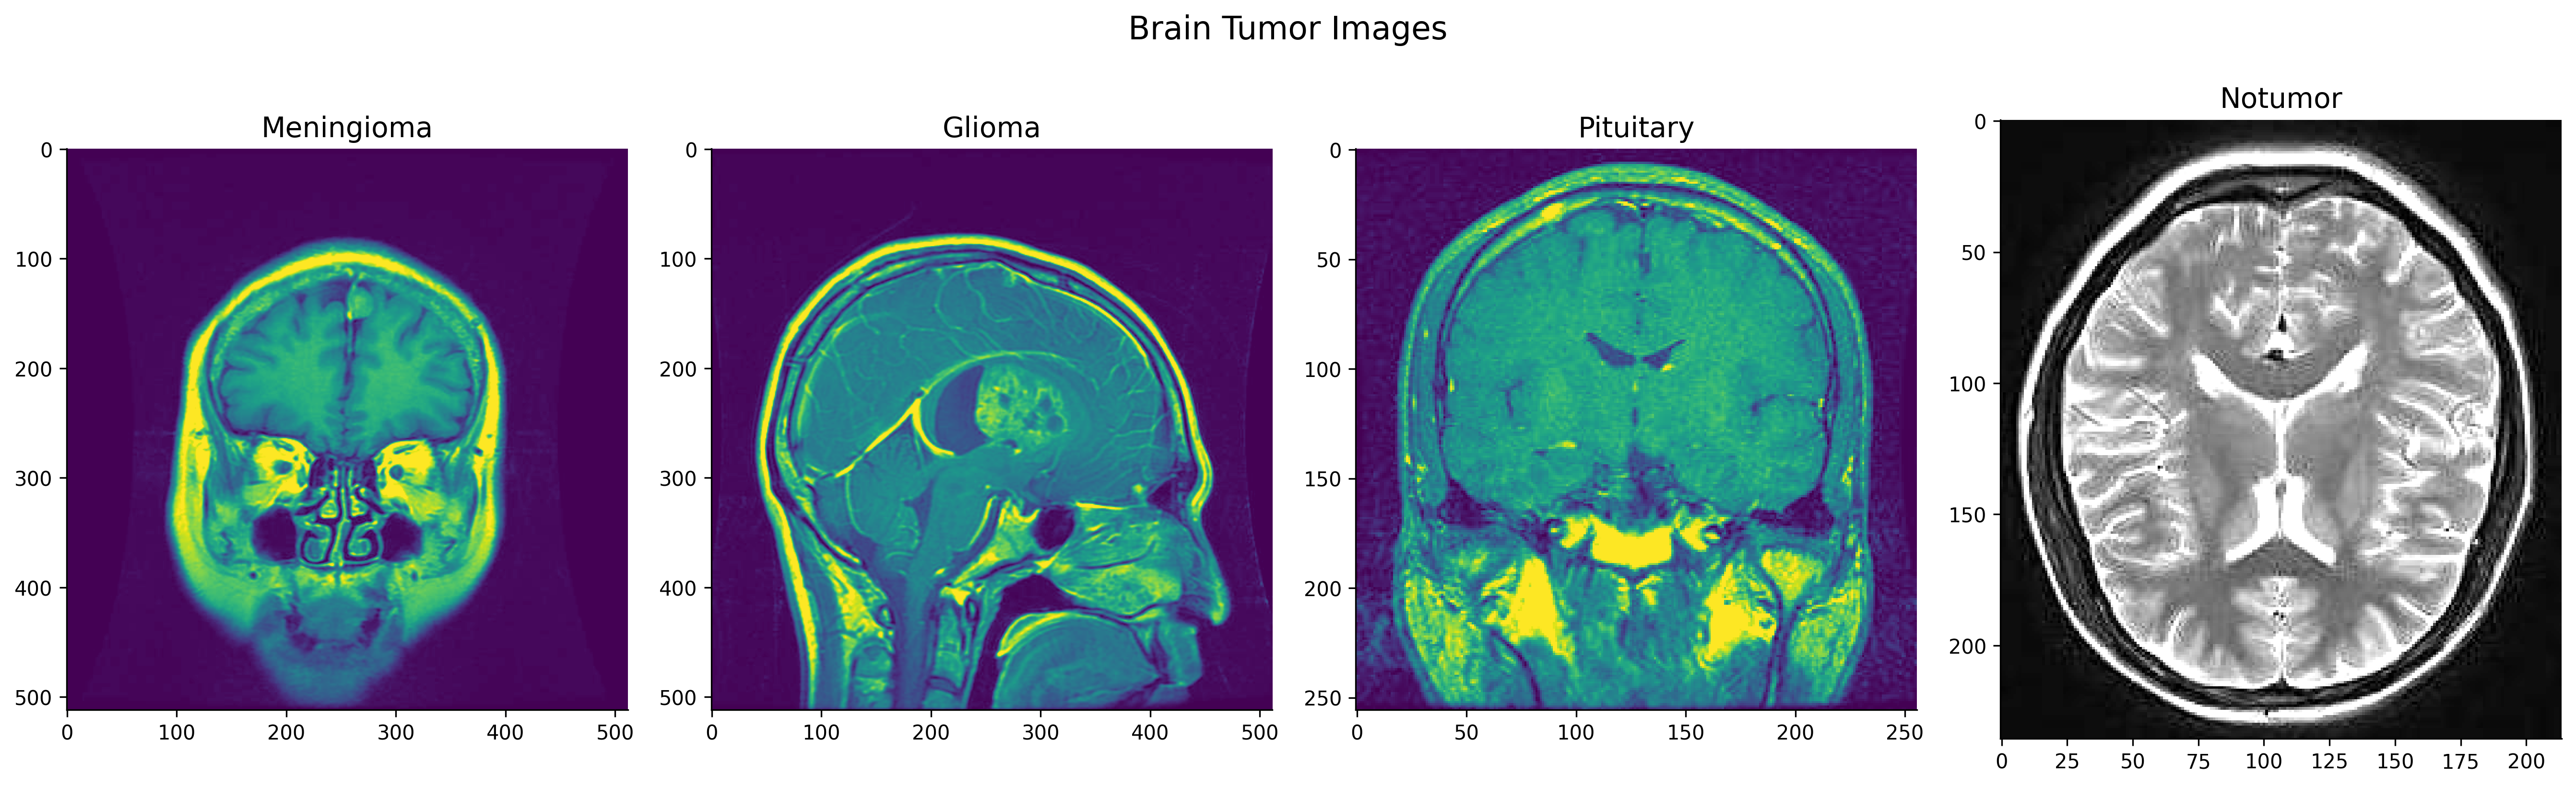

In [14]:
BRIGHTNESS_FACTOR = 1.7
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (18, 5))
axes = axes.flatten()
fig.suptitle("Brain Tumor Images", fontsize = 16, fontdict = dict(weight = 'bold'), y = 1.04)
for curr_title, filename, curr_axis in zip(TUMOR_CLASS, IMAGE_DATA_PATHS, axes[:4]):
    curr_image = Image.open(os.path.join(filename, os.listdir(filename)[2]))
    img_enhancer = ImageEnhance.Brightness(curr_image)
    curr_axis.imshow(img_enhancer.enhance(BRIGHTNESS_FACTOR))
    curr_axis.set_title(" ".join(curr_title.split('_')).title(), fontsize = 14)

fig.tight_layout()
sns.despine()

## Image Augmentation

In [15]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [16]:
import numpy as np
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [17]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE) 

### DenseNet201

In [18]:
train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, depth=4)))
test_ds = test_ds.map(lambda x, y: (x, tf.one_hot(y, depth=4)))
val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, depth=4))) 

In [19]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D

# Detect and initialize the TPU
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

# Instantiating the model within the strategy scope creates the model on the TPU
with strategy.scope():
    base_model = DenseNet201(include_top=False, weights='imagenet', input_shape=(512, 512, 3))

    # Freeze the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom head
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.4)(x)
    predictions = Dense(4, activation='softmax')(x)  # Ensure output layer has 4 units and softmax activation

    # Combine base model and custom head into a new model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU

I0000 00:00:1708876111.639044      13 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [20]:
# Model training inside the TPU strategy scope
history = model.fit( 
    train_ds,
    validation_data=test_ds, 
    epochs=100
) 

Epoch 1/100


2024-02-25 15:48:32.246068: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:48:32.268667: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:48:32.289544: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:48:32.310283: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:48:32.331345: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:48:32.353402: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:48:32.375799: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this 

 1/72 ━━━━━━━━━━━━━━━━━━━━ 51:29 44s/step - accuracy: 2.1250 - loss: 15.3627

2024-02-25 15:49:15.410388: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:49:15.410559: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:49:15.410686: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:49:15.410838: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:49:15.410908: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:49:15.410993: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:49:15.411134: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this 

13/72 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 2.4898 - loss: 20.8233

2024-02-25 15:49:17.372725: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 15:49:17.566998: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


19/72 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - accuracy: 2.6227 - loss: 19.7455

2024-02-25 15:49:18.357937: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


30/72 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 2.8412 - loss: 18.1000

2024-02-25 15:49:20.017603: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


59/72 ━━━━━━━━━━━━━━━━━━━━ 7s 568ms/step - accuracy: 3.2633 - loss: nan 

2024-02-25 15:49:48.293806: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


62/72 ━━━━━━━━━━━━━━━━━━━━ 5s 548ms/step - accuracy: 3.2982 - loss: nan

2024-02-25 15:49:48.786017: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 3.4059 - loss: nan

2024-02-25 15:49:57.134025: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignVariableOp.


72/72 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 3.3666 - loss: nan - val_accuracy: 0.7832 - val_loss: 0.8866
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 5.4306 - loss: nan

2024-02-25 15:50:45.620020: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - accuracy: 5.3656 - loss: nan - val_accuracy: 0.7902 - val_loss: 0.8174
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 203ms/step - accuracy: 5.7042 - loss: nan - val_accuracy: 0.7063 - val_loss: 0.8208
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 207ms/step - accuracy: 6.1365 - loss: nan - val_accuracy: 0.8462 - val_loss: 0.6863
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 16s 205ms/step - accuracy: 6.2294 - loss: nan - val_accuracy: 0.8042 - val_loss: 0.7189
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 201ms/step - accuracy: 6.2101 - loss: nan - val_accuracy: 0.8182 - val_loss: 0.5940
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 201ms/step - accuracy: 6.5254 - loss: nan - val_accuracy: 0.8252 - val_loss: 0.6328
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 200ms/step - accuracy: 6.6307 - loss: nan - val_accuracy: 0.7343 - val_loss: 0.6606
Epoch 9/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step - accuracy: 6.6198 - loss: nan - val_accuracy: 0.8741 - val_loss: 0.5

In [21]:
model.save('DenseNet201_TPU.keras') 

In [22]:
train_score = model.evaluate(train_ds , steps =16 , verbose = 1)
valid_score = model.evaluate(test_ds , steps = 16 , verbose = 1)
test_score = model.evaluate(val_ds , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 7.5882 - loss: nan
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 6.5640 - loss: 4.5972
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 6.2959 - loss: 8.3416
Train Loss:  0.009657071903347969
Train Accuracy:  1.0
--------------------
Validation Loss:  0.8529531359672546
Validation Accuracy:  0.875
--------------------
Test Loss:  0.879533588886261
Test Accuracy:  0.8046875


In [23]:
with open('model_scores.txt', 'w') as file:
    file.write("Train Loss: {}\n".format(train_score[0]))
    file.write("Train Accuracy: {}\n".format(train_score[1]))
    file.write('-' * 20 + '\n')
    file.write("Validation Loss: {}\n".format(valid_score[0]))
    file.write("Validation Accuracy: {}\n".format(valid_score[1]))
    file.write('-' * 20 + '\n')
    file.write("Test Loss: {}\n".format(test_score[0]))
    file.write("Test Accuracy: {}\n".format(test_score[1]))

print("Scores saved successfully.")

Scores saved successfully.


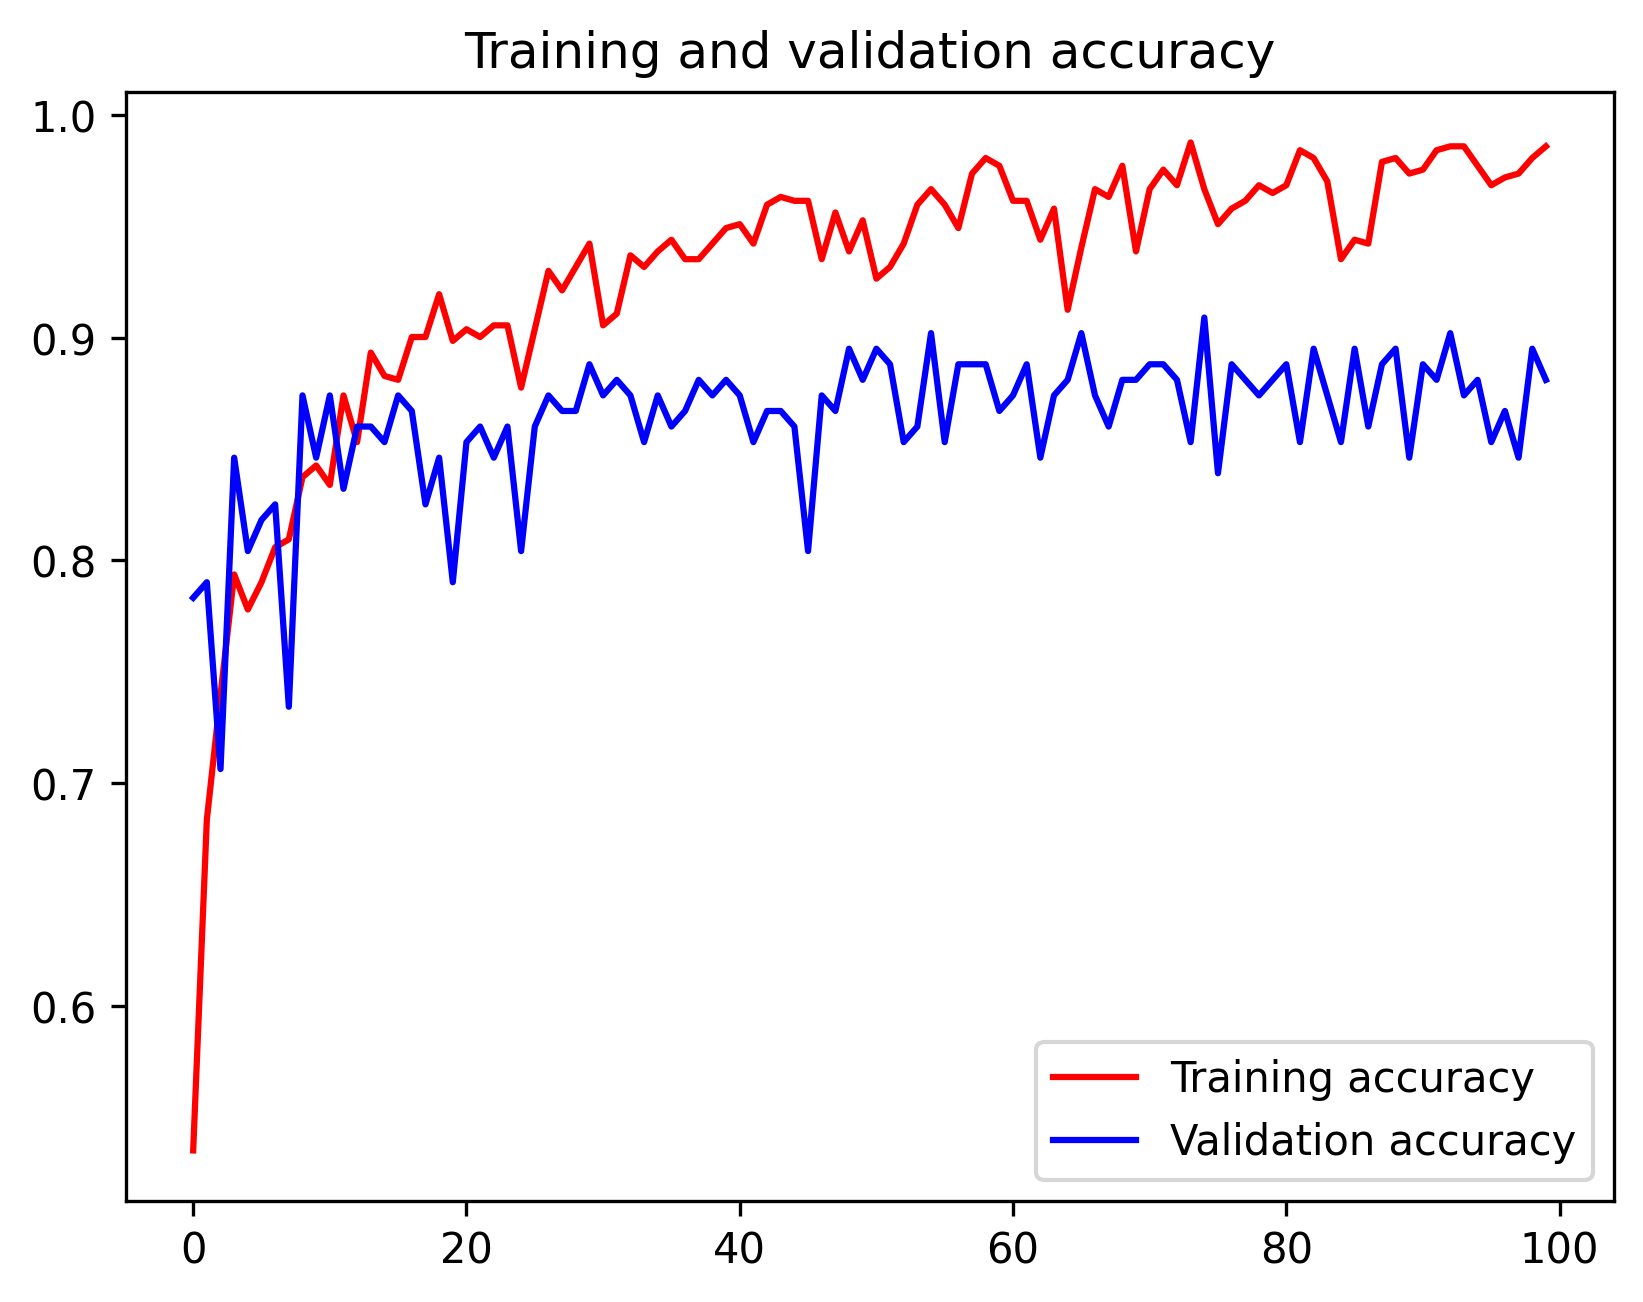

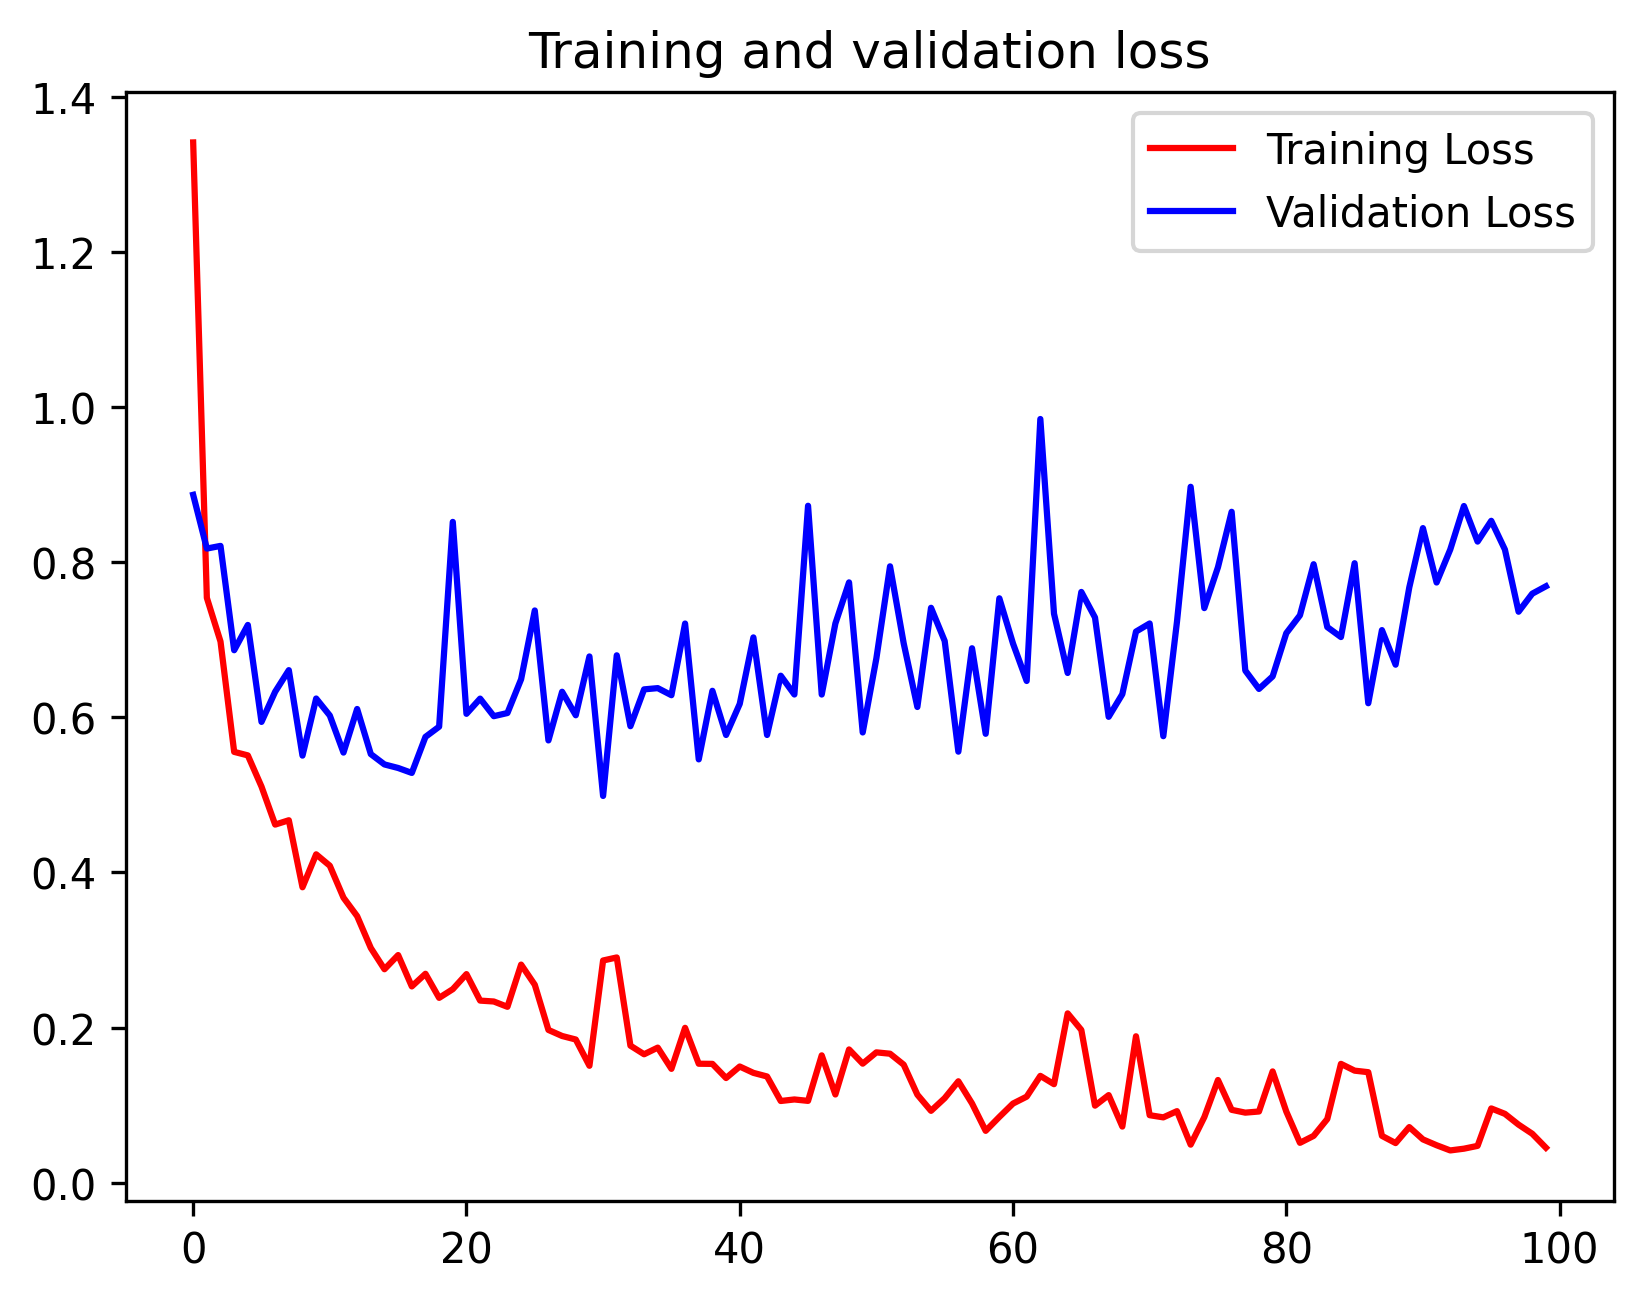

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('Training and validation accuracy.png')
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('Training and validation loss.png')
plt.show()

In [25]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 512, 512,  │       0 │ -                    │
│ (InputLayer)        │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ zero_padding2d      │ (None, 518, 518,  │       0 │ input_layer[0][0]    │
│ (ZeroPadding2D)     │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1_conv (Conv2D) │ (None, 256, 256,  │   9,408 │ zero_padding2d[0][0] │
│                     │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1_bn            │ (None, 256, 256,  │     256 │ conv1_conv[0][0]     │
│ (BatchNormalizatio… │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1_relu          │ (None, 256, 256,  │       0 │ conv1_bn[0][0]       │
│ (Activation)        │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ zero_padding2d_1    │ (None, 258, 258,  │       0 │ conv1_relu[0][0]     │
│ (ZeroPadding2D)     │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ pool1               │ (None, 128, 128,  │       0 │ zero_padding2d_1[0]… │
│ (MaxPooling2D)      │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_0_bn   │ (None, 128, 128,  │     256 │ pool1[0][0]          │
│ (BatchNormalizatio… │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_0_relu │ (None, 128, 128,  │       0 │ conv2_block1_0_bn[0… │
│ (Activation)        │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_1_conv │ (None, 128, 128,  │   8,192 │ conv2_block1_0_relu… │
│ (Conv2D)            │ 128)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_1_bn   │ (None, 128, 128,  │     512 │ conv2_block1_1_conv… │
│ (BatchNormalizatio… │ 128)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_1_relu │ (None, 128, 128,  │       0 │ conv2_block1_1_bn[0… │
│ (Activation)        │ 128)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_2_conv │ (None, 128, 128,  │  36,864 │ conv2_block1_1_relu… │
│ (Conv2D)            │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_concat │ (None, 128, 128,  │       0 │ pool1[0][0],         │
│ (Concatenate)       │ 96)               │         │ conv2_block1_2_conv… │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block2_0_bn   │ (None, 128, 128,  │     384 │ conv2_block1_concat… │
│ (BatchNormalizatio… │ 96)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block2_0_relu │ (None, 128, 128,  │       0 │ conv2_block2_0_bn[0… │
│ (Activation)        │ 96)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block2_1_conv │ (None, 128, 128,  │  12,288 │ conv2_block2_0_relu

 Total params: 21,278,798 (81.17 MB)

 Trainable params: 985,604 (3.76 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

 Optimizer params: 1,971,210 (7.52 MB)